In [20]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)

# Combine the data into a single dataset
merged_df = pd.merge(city_df,ride_df, on="city")
# Display the data table for preview
merged_df.head(10)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


## Bubble Plot of Ride Sharing Data

In [21]:
# Obtain the x and y coordinates for each of the three city types
# Separating city type groups
urban = merged_df[(merged_df["type"]=="Urban")]
suburban = merged_df[(merged_df["type"]=="Suburban")]
rural = merged_df[(merged_df["type"]=="Rural")]

# Ride count per city/type
urban_rides = urban.groupby("city")["ride_id"].count()
suburban_rides = suburban.groupby("city")["ride_id"].count()
rural_rides = rural.groupby("city")["ride_id"].count()

# Avg fare per city/type
urban_fare_avg = urban.groupby("city")["fare"].mean()
suburban_fare_avg = suburban.groupby("city")["fare"].mean()
rural_fare_avg = rural.groupby("city")["fare"].mean()

# Total driver counts by city
driver_totals = city_df.groupby("city")["driver_count"].sum()

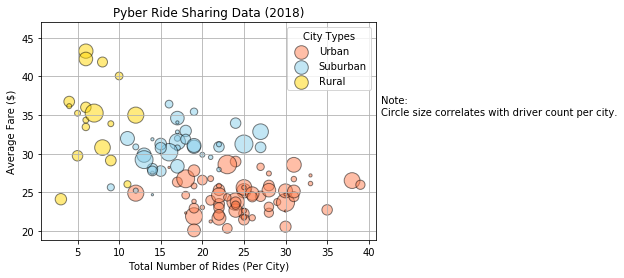

In [42]:
# Build the scatter plots for each city types: (u)rban, (s)uburban, (r)ural
plot_u = plt.scatter(urban_rides, urban_fare_avg, s=driver_totals*5, c="coral", alpha=0.50, edgecolors="black", linewidths=1)
plot_s = plt.scatter(suburban_rides, suburban_fare_avg, s=driver_totals*5, c="skyblue", alpha=0.50, edgecolors="black", linewidths=1)
plot_r = plt.scatter(rural_rides, rural_fare_avg, s=driver_totals*5, c="gold", alpha=0.50, edgecolors="black", linewidths=1)

# Incorporate the other graph properties
plt.grid()
plt.ylim(top=47)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2018)")

# Create a legend
plt.legend(handles=[plot_u,plot_s,plot_r], labels=['Urban','Suburban','Rural'],title="City Types", loc="best")

# Incorporate a text label regarding circle size
plt.text(41.5,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)

# Save Figure
plt.savefig("Bubble_Plot_Ride_Sharing_Data.png", bbox_inches='tight')

# Show plot
plt.show()

## Total Fares by City Type

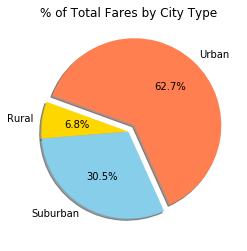

In [47]:
# Calculate Type Percents
urban_fare = urban["fare"].sum()
suburban_fare = suburban["fare"].sum()
rural_fare = rural["fare"].sum()
total_fare = [urban_fare, suburban_fare, rural_fare]
colors = ["coral", "skyblue", "gold"]
explode = (0.1,0,0)
labels = ["Urban","Suburban","Rural"]

# Build Pie Chart
plt.pie(total_fare, explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, counterclock=False, startangle=160)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Percentage_of_Fares.png")

# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


In [ ]:
# Show Figure
plt.show()